# Thera Bank:- Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

# Read the Dataset

In [3]:
bank_df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [4]:
bank_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 1. Read the column description and ensure you understand each attribute well

In [5]:
bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
bank_df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [7]:
bank_df.head(2)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [9]:
bank_df.shape

(5000, 14)

In [10]:
bank_df.info

<bound method DataFrame.info of         ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4   1.60          1   
1        2   45          19      34    90089       3   1.50          1   
2        3   39          15      11    94720       1   1.00          1   
3        4   35           9     100    94112       1   2.70          2   
4        5   35           8      45    91330       4   1.00          2   
5        6   37          13      29    92121       4   0.40          2   
6        7   53          27      72    91711       2   1.50          2   
7        8   50          24      22    93943       1   0.30          3   
8        9   35          10      81    90089       3   0.60          2   
9       10   34           9     180    93023       1   8.90          3   
10      11   65          39     105    94710       4   2.40          3   
11      12   29           5      45    90277       3   0.10          2   
12    

# Information on the features or attributes

The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

1.Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable

2.Securities Account - Does the customer have a securities account with the bank?

3.CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

4.Online - Does the customer use internet banking facilities?

5.Credit Card - Does the customer use a credit card issued by UniversalBank?
    

Interval variables are as below:

1. Age - Age of the customer

2. Experience - Years of experience

3. Income - Annual income in dollars

4. CCAvg - Average credit card spending

5. Mortage - Value of House Mortgage



Ordinal Categorical Variables are:
    
1. Family - Family size of the customer

2. Education - education level of the customer 

The nominal variable is :

1.ID
2. Zip Code

In [11]:
# No columns have null data in the file
bank_df.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [12]:
bank_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [14]:
#finding unique data
bank_df.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

# Observation on given data

Min experience is showing negative values, which is incorrect, so we have to clean that column

# 2. Study the data distribution in each attribute, share your findings

# Data distribution chart

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


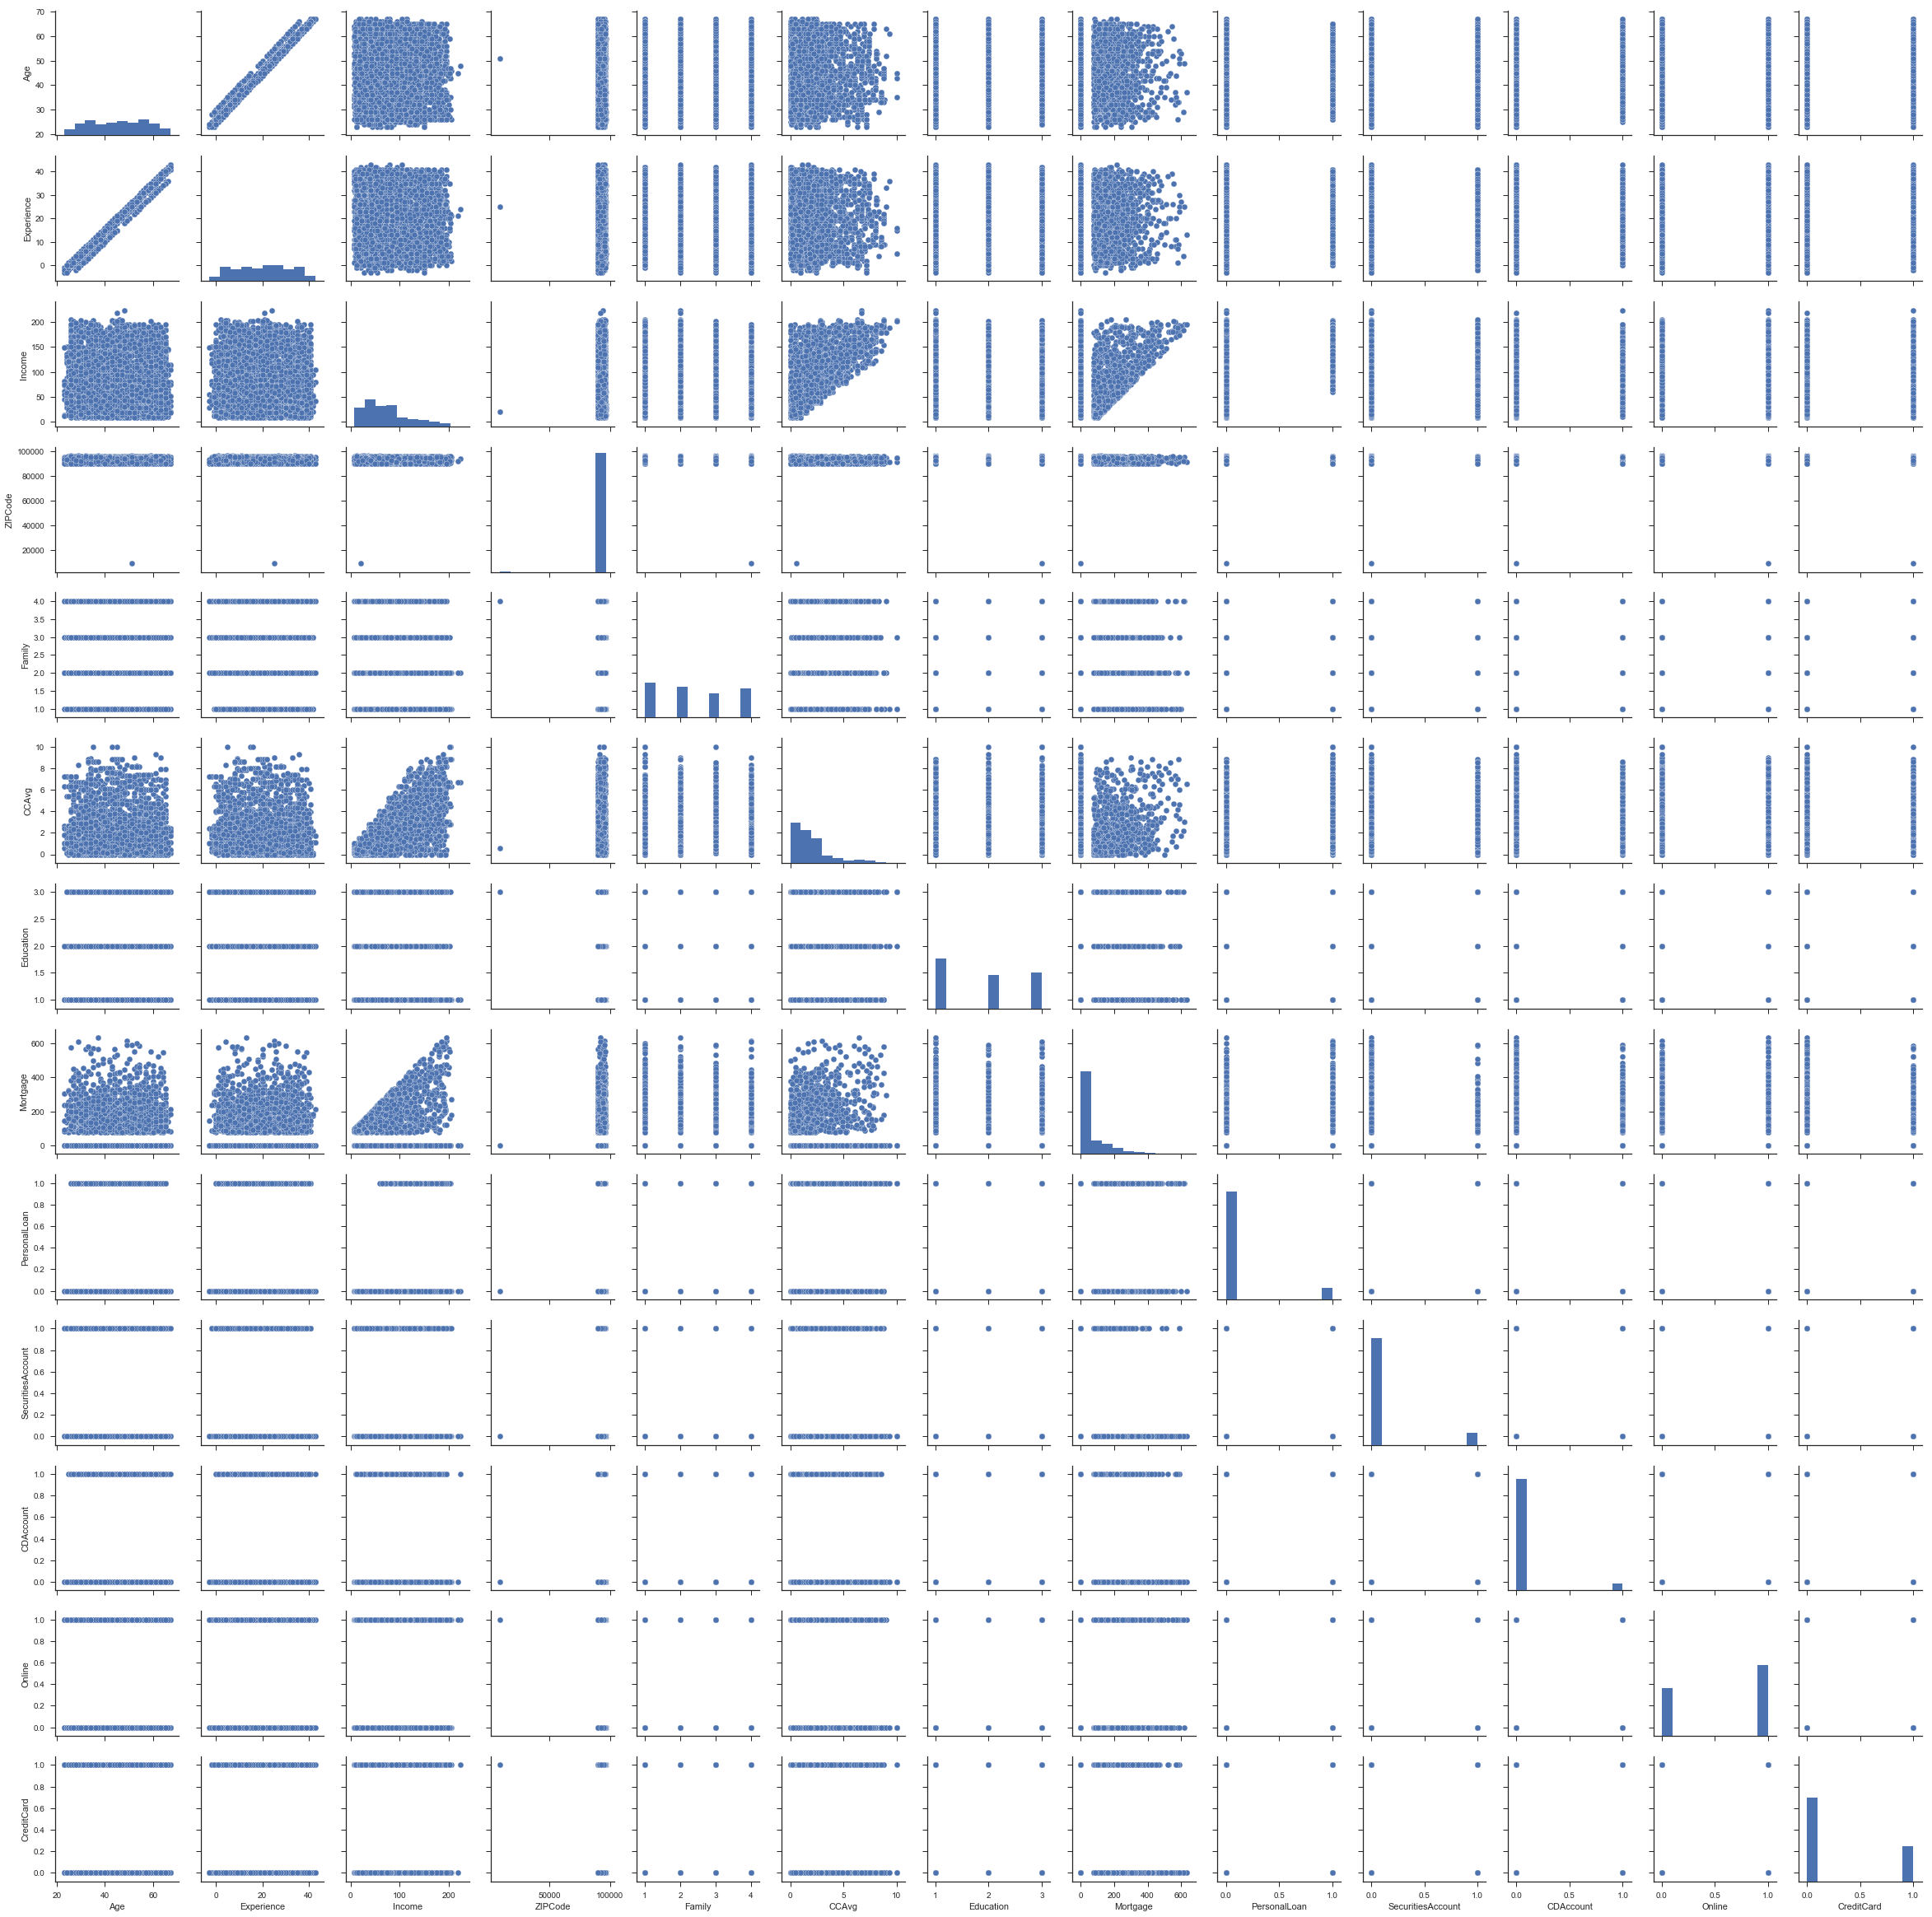

In [16]:
plt = sns.pairplot(bank_df[['Age','Experience','Income','ZIPCode','Family','CCAvg' ,'Education' , 'Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']] )
bank_df.head(1)

1.Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median.

2.Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

3. Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [17]:
# there are 52 records with negative experience. Before proceeding any further we need to clean the same
bank_df[bank_df['Experience'] < 0]['Experience'].count()

52

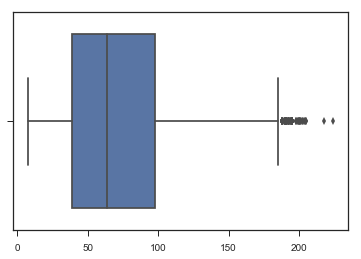

In [18]:
plt = sns.boxplot(bank_df[['Income']])#,'Experience','Income','ZIPCode','Family','CCAvg' ,'Education' , 'Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']] )

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


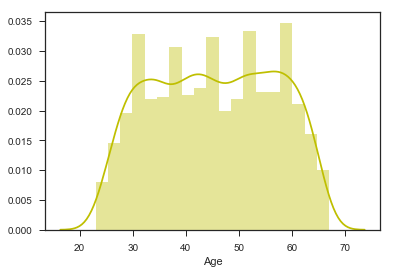

In [20]:
sns.distplot( bank_df['Age'], color = 'y')

# Observation

Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most earn an income between 10K to 100K.

# Negative Experience cleaning

In [22]:
dfposExp = bank_df.loc[bank_df['Experience'] >0]
mask = bank_df.Experience < 0
column_name = 'Experience'
mylist = bank_df.loc[mask]['ID'].tolist()

In [23]:
for id in mylist:
    age = bank_df.loc[np.where(bank_df['ID']==id)]["Age"].tolist()[0]
    education = bank_df.loc[np.where(bank_df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfposExp[(dfposExp.Age == age) & (dfposExp.Education == education)]
    exp = df_filtered['Experience'].median()
    bank_df.loc[bank_df.loc[np.where(bank_df['ID']==id)].index, 'Experience'] = exp

In [25]:

bank_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# what is the influence of Income level on whether a customer takes a personal loan across the education levels.

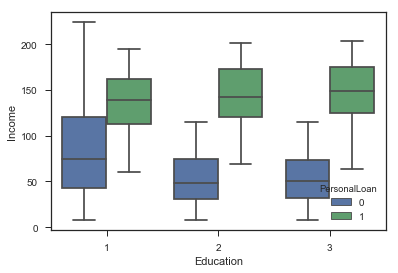

In [26]:
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=bank_df)

# Observation

The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.

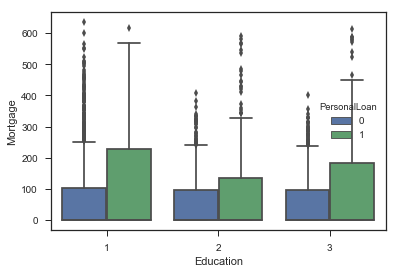

In [27]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=bank_df)

# Observation

Customers who taken loan also have higher mortgages.

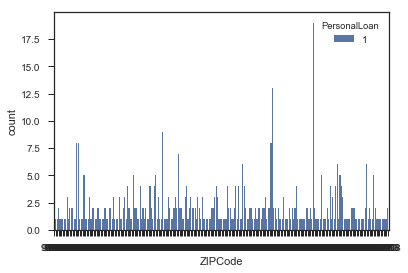

In [28]:
sns.countplot(x="ZIPCode", data=bank_df[bank_df.PersonalLoan==1], hue ="PersonalLoan",orient ='v')

In [30]:
zipcode_top5 = bank_df[bank_df.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

# Observation

Top 5 locations who appled personal loan before

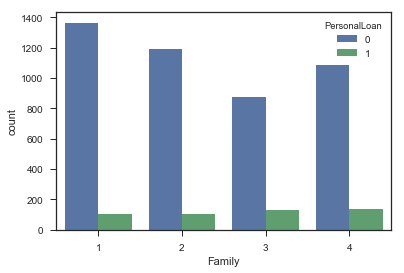

In [31]:
sns.countplot(x="Family", data=bank_df,hue="PersonalLoan")

# Observations

Does family size have any influence on whether a customer accepts a personal loan offer?

In [32]:
familysize_no = np.mean( bank_df[bank_df.PersonalLoan == 0]['Family'] )
familysize_no

2.3734513274336284

In [33]:

familysize_yes = np.mean( bank_df[bank_df.PersonalLoan == 1]['Family'] )
familysize_yes

2.6125

In [26]:
from scipy import stats

stats.ttest_ind(df[df.PersonalLoan == 1]['Family'], df[df.PersonalLoan == 1]['Family'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

# Observation

Family size seems to have no impact on decision to take a loan.

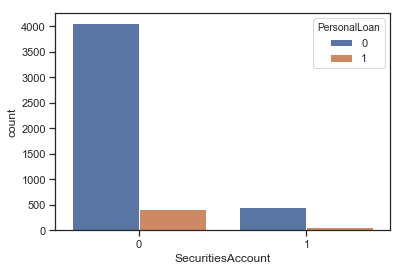

In [27]:
sns.countplot(x="SecuritiesAccount", data=df,hue="PersonalLoan")

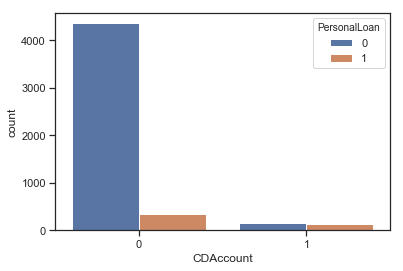

In [28]:
sns.countplot(x="CDAccount", data=df,hue="PersonalLoan")

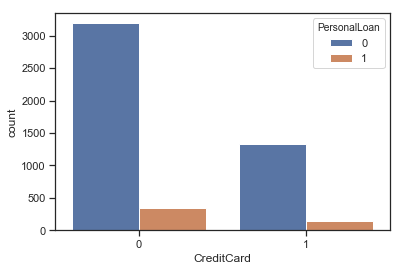

In [29]:
sns.countplot(x="CreditCard", data=df,hue="PersonalLoan")

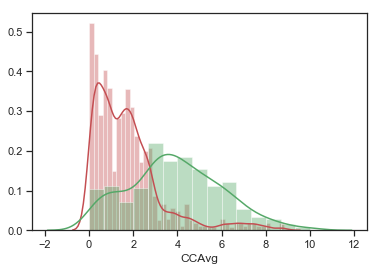

In [30]:
sns.distplot( df[df.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['CCAvg'], color = 'g')

# Observation

Customers who have taken personal loan have higher credit card average than those who did nottake. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

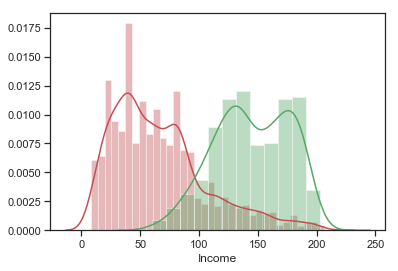

In [31]:
sns.distplot(df[df.PersonalLoan == 0]['Income'],color = 'r')
sns.distplot(df[df.PersonalLoan == 1]['Income'],color = 'g')

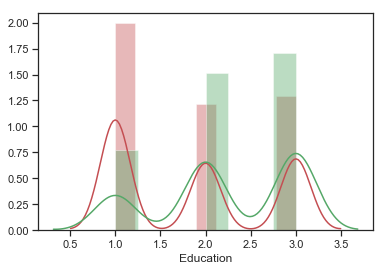

In [32]:
sns.distplot( df[df.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['Education'], color = 'g')

# Correlation comparison with heat map¶

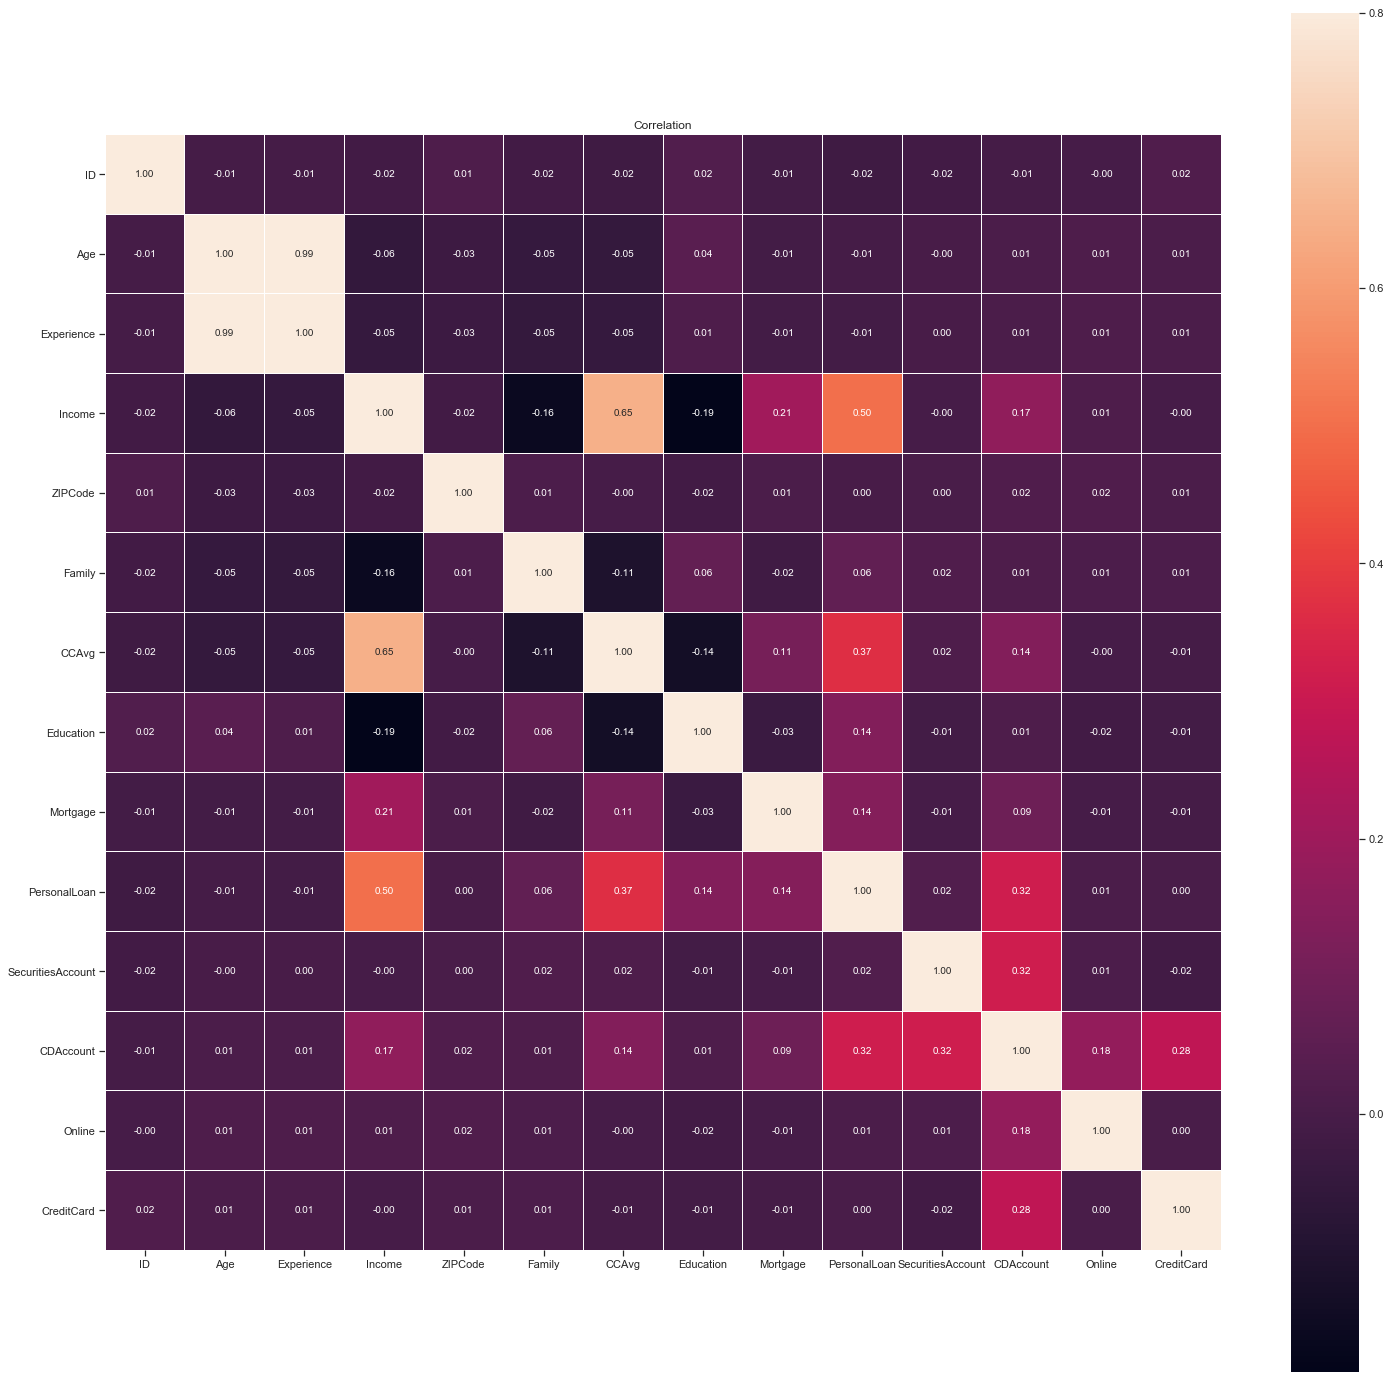

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()


# Observation

1. Age and Experience is highly corelated
2. Income and CCAvg also corelated

# 3. Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable

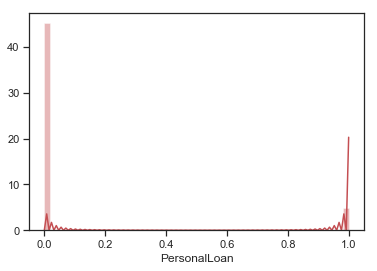

In [65]:
sns.distplot( df['PersonalLoan'], color = 'r')

From the above distribution plot of target vaiable(PersonalLoan) it is clear that majority of customers didnt apply for personal loan i.e (0.0 distribution) as shown in the graph and less percenatge of customers interested for Personal Loan i.e (1.1 distribution) as shown in the graph. 

# 4. Splitting Data to Train And Test (70:30)

In [34]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)

In [35]:
train_set.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.458286,73.814571,93176.260286,2.402857,1.890286,57.439714,0.094857,0.106857,0.061143,0.595714,0.296286
std,11.498213,45.987910,1739.659921,1.148576,0.840846,101.949410,0.293059,0.308976,0.239626,0.490823,0.456684
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94608.000000,3.000000,3.000000,102.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
test_set.describe()


,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.058667,73.680000,93097.069333,2.381333,1.859333,54.303333,0.098667,0.098667,0.058667,0.599333,0.288667
std,11.379875,46.155684,2818.830809,1.145772,0.837465,101.161761,0.298313,0.298313,0.235078,0.490197,0.453294
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93555.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94608.000000,3.000000,3.000000,97.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,205.000000,96651.000000,4.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("PersonalLoan")
test_labels = test_set.pop("PersonalLoan")

# 5.Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

# Logistic Regression

In [38]:
#df1=df.values # convert the data frame to a numpy array
#print(type(df1))
#print(df1)

In [39]:
#print(df1.shape)
#df1=df1[:,1:]
#print(df1.shape)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_reg=LogisticRegression()

In [42]:
lm=log_reg.fit(train_set, train_labels)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
log_reg.score(train_set, train_labels)

0.9074285714285715

In [44]:
log_reg.score(test_set,test_labels)

0.9113333333333333

In [66]:
y_pred=log_reg.predict(test_set)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:

score =accuracy_score(test_labels,y_pred)
score

0.9113333333333333

# Naive Bayes

In [71]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
Na=naive_model.score(test_set,test_labels)

In [72]:
print(Na)

0.9166666666666666


In [46]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


# KNeighborsClassifier

In [47]:
train_set_indep = df.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = df["PersonalLoan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [48]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [49]:
print(acc)

0.9446297531687792


# 6. Print the confusion matrix for all the above models

In [50]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

# Confusion matrix for Naive Bayes

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


# Confusion matrix for KNN

In [63]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_Test, predicted))

[[1366    7]
 [  76   50]]


# Confusion matrix for Logistic Regression

In [64]:
from sklearn import metrics
print(metrics.confusion_matrix(test_labels,y_pred))

[[1313   39]
 [  94   54]]


# 7. Give your reasoning on which is the best model in this case and why it performs better? 

In [69]:
print(" Accuracy of Logistic Regression is :",score)

 Accuracy of all Logistic Regression is : 0.9113333333333333


In [70]:
print(" Accuracy of KNN is :",acc)

 Accuracy of all KNN is : 0.9446297531687792


In [73]:
print(" Accuracy of Naive Bayes is :",Na)

 Accuracy of Naive Bayes is : 0.9166666666666666


# From the above study , it seems like KNN algorithm have the highest accuracy and we can choose that as our final model.

The aim of the Thera bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above study , it seems like KNN algorithm have the highest accuracy and we can choose that as our final model and ir perform better because of of the findings of nearest dataset behavior process.

In case of KNN classification, a majority voting is applied over the k nearest datapoints whereas, in KNN regression, mean of k nearest datapoints is calculated as the output. As a rule of thumb, we selects odd numbers as k. KNN is a lazy learning model where the computations happens only runtime.

Loss function : There is no training involved in KNN. During testing, k neighbors with minimum distance, will take part in classification /regression.
Advantages :
Easy and simple machine learning model.
Few hyperparameters to tune.